<a href="https://colab.research.google.com/github/dguo4/kaggle-JaneStreet/blob/main/nnModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NN Model - Deep Learning

#Optimizing Neural Network Structures with Keras-Tuner

In [2]:
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt


In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


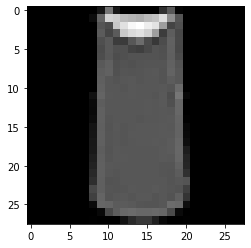

In [4]:
# 28*28 and 10 classes
plt.imshow(x_train[2], cmap='gray')
plt.show()

In [8]:
x_train.shape[1:]

(28, 28)

In [18]:
# !pip install keras-tuner

from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Activation
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters
import time

# reshape data to a CNN model

LOG_DIR = f"{int(time.time())}"

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

def build_model(hp):
  model = keras.models.Sequential()

  model.add(Conv2D(hp.Int("input_units",min_value=32, max_value=256, step=32), (3, 3), input_shape=x_train.shape[1:]))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  for i in range(hp.Int('n_layers',1,4)):
    model.add(Conv2D(hp.Int(f"conv_{i}_units",32,256,32), (3, 3)))
    model.add(Activation('relu'))
  
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

  model.add(Dense(10))
  model.add(Activation("softmax"))

  model.compile(optimizer="adam",
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])
  return model



In [19]:
tuner = RandomSearch(
    build_model, 
    objective="val_accuracy",
    max_trials=1, 
    executions_per_trial=1, 
    directory=LOG_DIR
)

tuner.search(x=x_train, 
             y=y_train, 
             epochs=1, 
             batch_size=64, 
             validation_data=(x_test, y_test))

Trial 1 Complete [00h 01m 31s]
val_accuracy: 0.8282999992370605

Best val_accuracy So Far: 0.8282999992370605
Total elapsed time: 00h 01m 31s
INFO:tensorflow:Oracle triggered exit


In [22]:
print(tuner.get_best_hyperparameters()[0].values)

{'input_units': 96, 'n_layers': 1, 'conv_0_units': 32}


In [23]:
print(tuner.results_summary())

Results summary
Results in 1608780616/untitled_project
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
input_units: 96
n_layers: 1
conv_0_units: 32
Score: 0.8282999992370605
None


In [24]:
print(tuner.get_best_models()[0].summary())
# the best model is get_best_modesl()[0]. you could directly use it to predict. 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 96)        960       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 96)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        27680     
_________________________________________________________________
activation_1 (Activation)    (None, 11, 11, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0